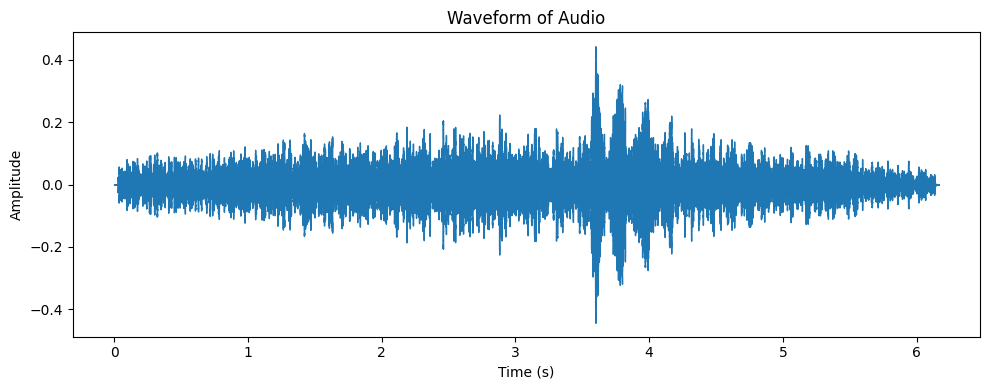

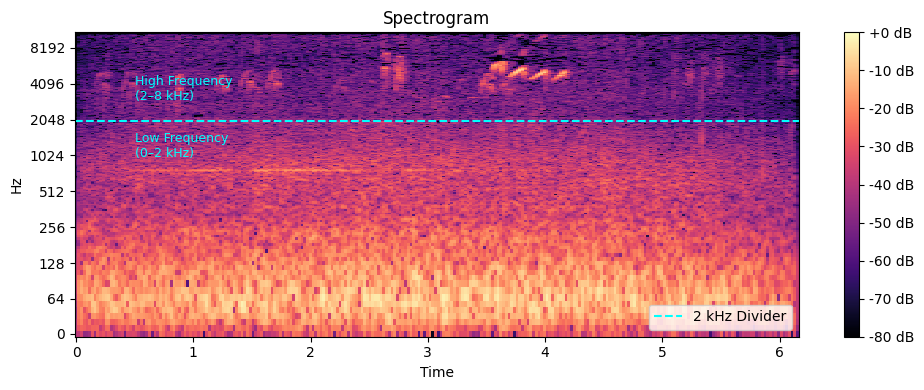

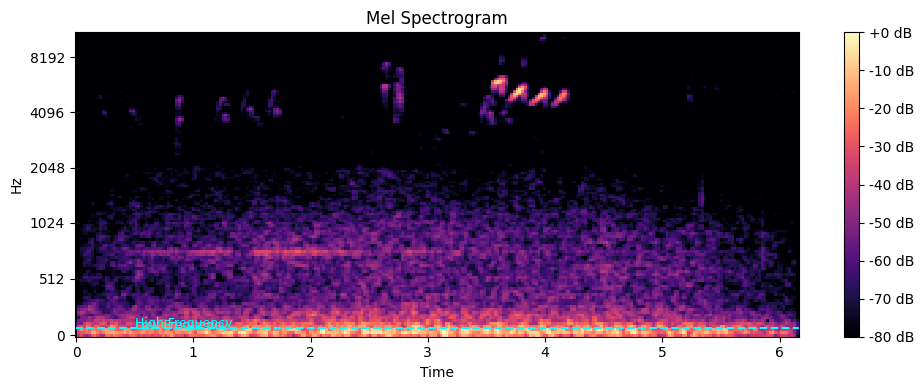

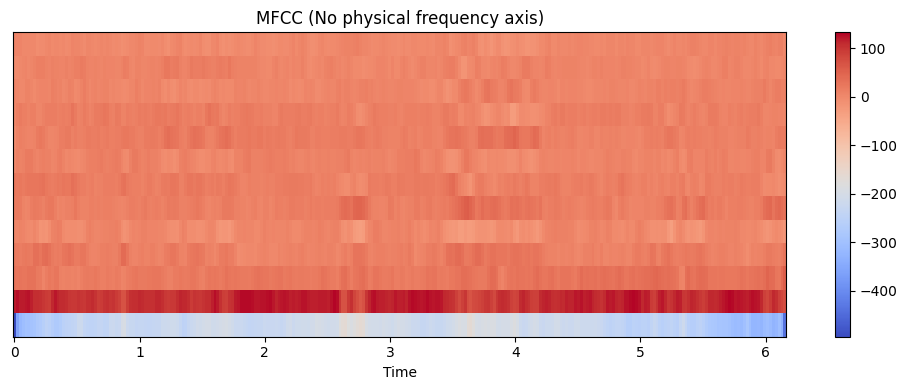

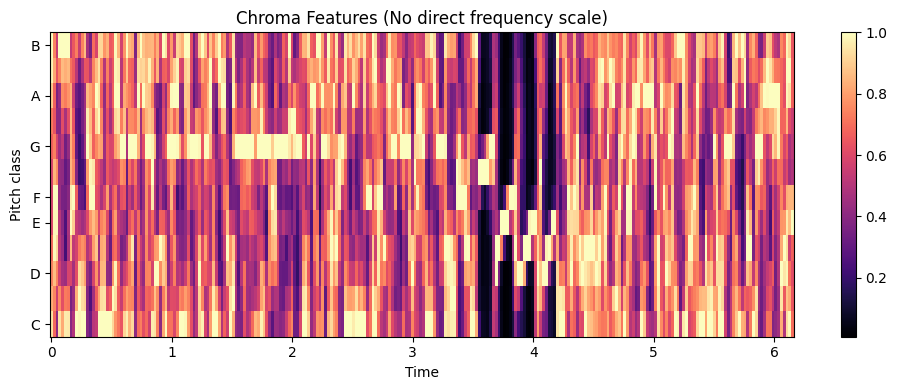

In [12]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file (update path accordingly)
audio_path = "train_audio/comsan/XC113844.ogg"
y, sr = librosa.load(audio_path, sr=22050)

# Display the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# 1️⃣ Spectrogram with high/low frequency indication
plt.figure(figsize=(10, 4))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.axhline(y=2000, color='cyan', linestyle='--', linewidth=1.5, label='2 kHz Divider')
plt.text(0.5, 1000, 'Low Frequency\n(0–2 kHz)', color='cyan', fontsize=9)
plt.text(0.5, 3000, 'High Frequency\n(2–8 kHz)', color='cyan', fontsize=9)
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# 2️⃣ Mel Spectrogram with annotation
plt.figure(figsize=(10, 4))
M = librosa.feature.melspectrogram(y=y, sr=sr)
M_dB = librosa.amplitude_to_db(M, ref=np.max)
librosa.display.specshow(M_dB, sr=sr, x_axis='time', y_axis='mel')
mel_f = librosa.mel_frequencies(n_mels=M.shape[0])

# Calculate index where mel frequency crosses ~2000 Hz
mel_divider = np.argmin(np.abs(mel_f - 2000))
plt.axhline(y=mel_divider, color='cyan', linestyle='--', linewidth=1.5)
plt.text(0.5, mel_divider - 10, 'Low Frequency', color='cyan', fontsize=9)
plt.text(0.5, mel_divider + 10, 'High Frequency', color='cyan', fontsize=9)
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram")
plt.tight_layout()
plt.show()

# 3️⃣ MFCC (Note: frequency bands are compressed, not actual Hz)
plt.figure(figsize=(10, 4))
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title("MFCC (No physical frequency axis)")
plt.tight_layout()
plt.show()

# 4️⃣ Chroma Features (Pitch class, not frequency scale)
plt.figure(figsize=(10, 4))
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title("Chroma Features (No direct frequency scale)")
plt.tight_layout()
plt.show()


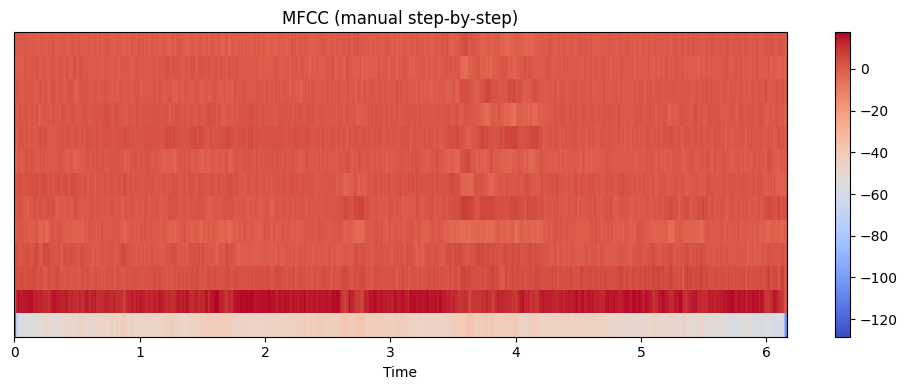

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Load audio
y, sr = librosa.load('train_audio/comsan/XC113844.ogg', sr=22050)

# Step 1: Frame the audio (default parameters simulate 10ms frames with ~50% overlap)
frame_length = int(0.025 * sr)  # ~25ms
hop_length = int(0.010 * sr)    # ~10ms (50% overlap for 20ms frame)

# Step 2: Apply STFT to each frame
stft = np.abs(librosa.stft(y, n_fft=frame_length, hop_length=hop_length))

# Step 3: Apply mel filterbank to convert to mel scale
mel_filter = librosa.filters.mel(sr=sr, n_fft=frame_length, n_mels=40)
mel_spectrum = np.dot(mel_filter, stft**2)  # Power spectrum

# Step 4: Take log of the mel spectrum
log_mel_spectrum = np.log(mel_spectrum + 1e-9)  # Avoid log(0)

# Step 5: Apply DCT to get MFCCs
mfcc = scipy.fftpack.dct(log_mel_spectrum, axis=0, type=2, norm='ortho')[0:13, :]

# Plot the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sr, hop_length=hop_length)
plt.colorbar()
plt.title('MFCC (manual step-by-step)')
plt.tight_layout()
plt.show()


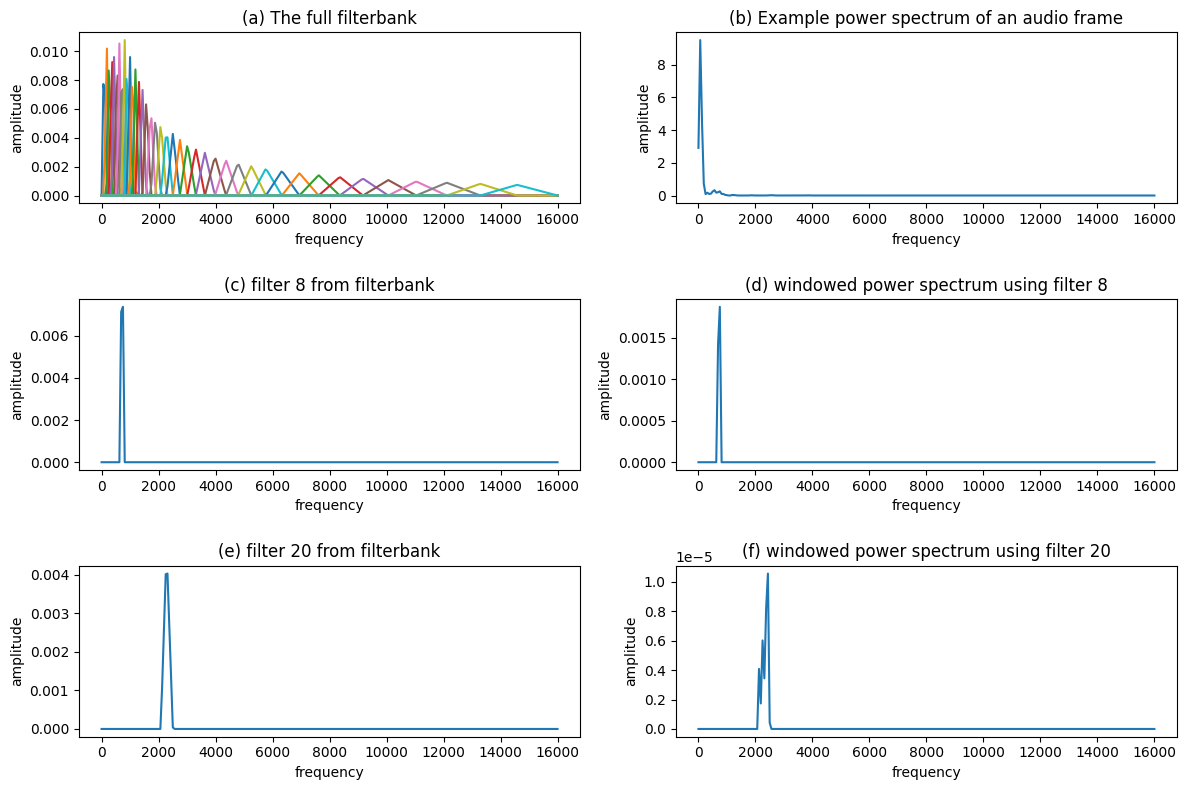

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# === Load your audio file ===
# Replace 'bird_audio.wav' with your actual file path
file_path = 'train_audio/comsan/XC113844.ogg'
y, sr = librosa.load(file_path, sr=None)

# === STFT and Power Spectrum ===
n_fft = 512
hop_length = 256
D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))**2

# === Mel Filter Bank ===
n_mels = 40
mel_basis = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

# === Frequencies for plotting ===
frequencies = np.linspace(0, sr / 2, int(1 + n_fft // 2))

# === Choose one frame from the power spectrum ===
frame_index = 10
power_spectrum = D[:, frame_index]

# === Plotting ===
plt.figure(figsize=(12, 8))

# (a) Full Mel filterbank
plt.subplot(3, 2, 1)
for i in range(n_mels):
    plt.plot(frequencies, mel_basis[i])
plt.title('(a) The full filterbank')
plt.xlabel('frequency')
plt.ylabel('amplitude')

# (b) Example power spectrum of an audio frame
plt.subplot(3, 2, 2)
plt.plot(frequencies, power_spectrum)
plt.title('(b) Example power spectrum of an audio frame')
plt.xlabel('frequency')
plt.ylabel('amplitude')

# (c) Filter 8
plt.subplot(3, 2, 3)
plt.plot(frequencies, mel_basis[7])
plt.title('(c) filter 8 from filterbank')
plt.xlabel('frequency')
plt.ylabel('amplitude')

# (d) Windowed power spectrum using filter 8
plt.subplot(3, 2, 4)
plt.plot(frequencies, mel_basis[7] * power_spectrum)
plt.title('(d) windowed power spectrum using filter 8')
plt.xlabel('frequency')
plt.ylabel('amplitude')

# (e) Filter 20
plt.subplot(3, 2, 5)
plt.plot(frequencies, mel_basis[19])
plt.title('(e) filter 20 from filterbank')
plt.xlabel('frequency')
plt.ylabel('amplitude')

# (f) Windowed power spectrum using filter 20
plt.subplot(3, 2, 6)
plt.plot(frequencies, mel_basis[19] * power_spectrum)
plt.title('(f) windowed power spectrum using filter 20')
plt.xlabel('frequency')
plt.ylabel('amplitude')

plt.tight_layout()
plt.show()


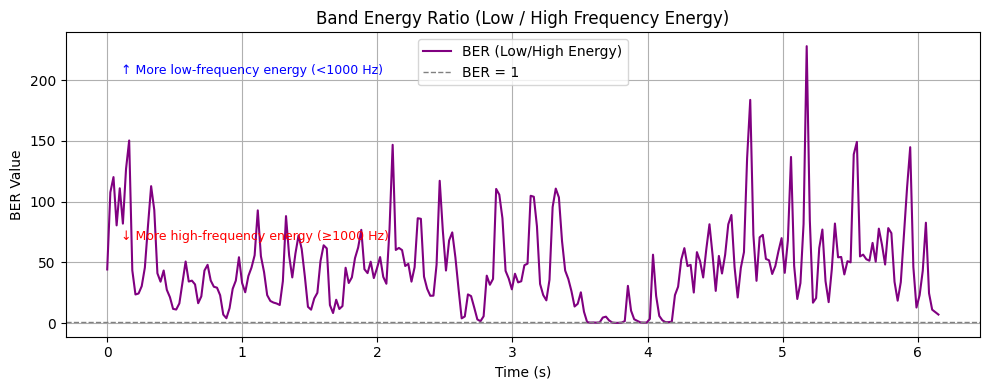

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio
audio_path = "train_audio/comsan/XC113844.ogg"
y, sr = librosa.load(audio_path, sr=22050)

# Compute STFT magnitude
S = np.abs(librosa.stft(y))
frequencies = librosa.fft_frequencies(sr=sr)

# Define band limits
low_freq_limit = 1000
low_band_idx = np.where(frequencies < low_freq_limit)[0]
high_band_idx = np.where(frequencies >= low_freq_limit)[0]

# Compute band energy
low_energy = np.sum(S[low_band_idx, :]**2, axis=0)
high_energy = np.sum(S[high_band_idx, :]**2, axis=0)
epsilon = 1e-10
ber = low_energy / (high_energy + epsilon)

# Time axis for plotting
frames = range(len(ber))
times = librosa.frames_to_time(frames, sr=sr)

# Plot BER
plt.figure(figsize=(10, 4))
plt.plot(times, ber, color='purple', label='BER (Low/High Energy)')
plt.axhline(y=1.0, color='gray', linestyle='--', linewidth=1, label='BER = 1')
plt.title("Band Energy Ratio (Low / High Frequency Energy)")
plt.xlabel("Time (s)")
plt.ylabel("BER Value")
plt.grid(True)

# Annotate meaning
plt.text(0.1, max(ber)*0.9, "↑ More low-frequency energy (<1000 Hz)", fontsize=9, color='blue')
plt.text(0.1, max(ber)*0.3, "↓ More high-frequency energy (≥1000 Hz)", fontsize=9, color='red')
plt.legend()
plt.tight_layout()
plt.show()

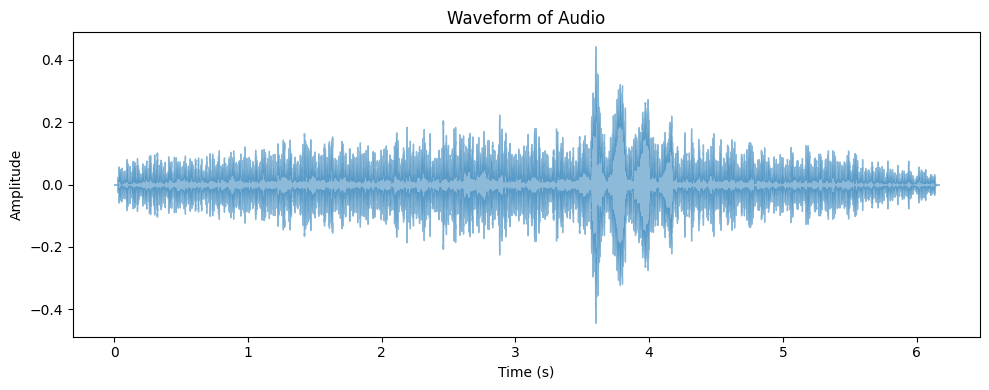

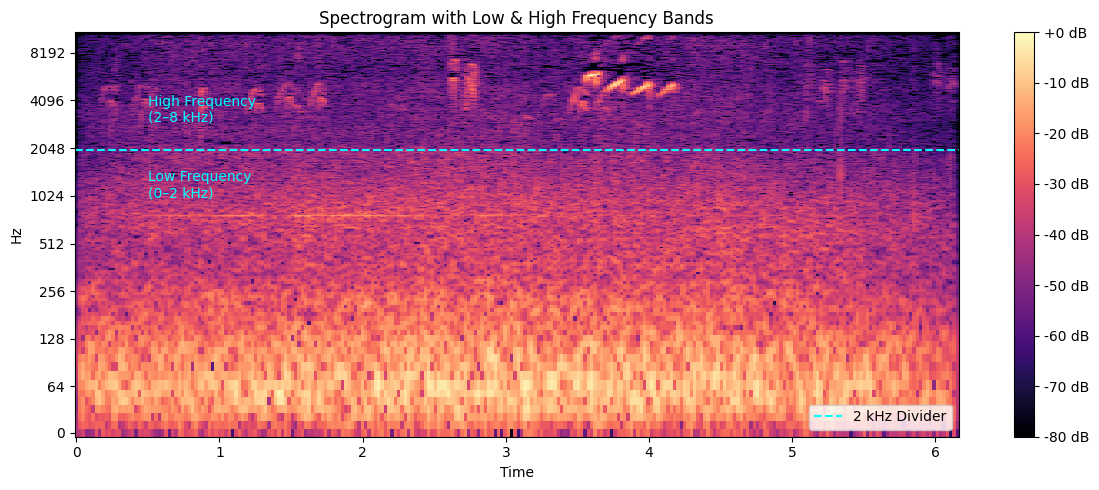

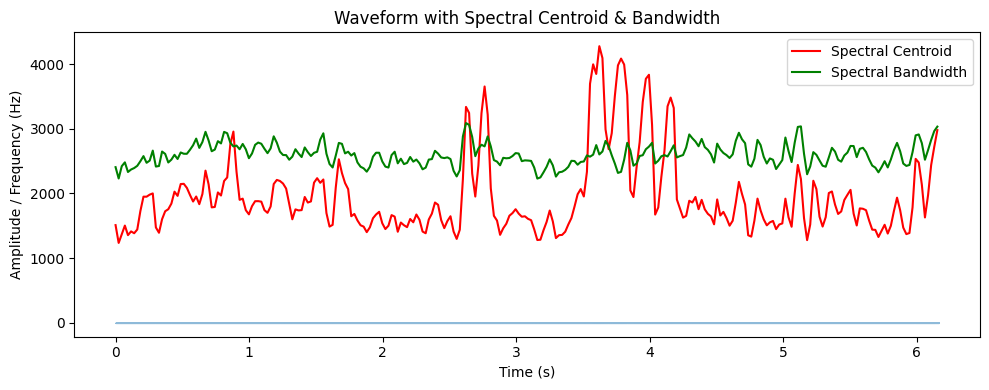

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_path = "train_audio/comsan/XC113844.ogg"  # Update path if needed
y, sr = librosa.load(audio_path, sr=22050)

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.title("Waveform of Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.show()

# Calculate and plot spectrogram
plt.figure(figsize=(12, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram with Low & High Frequency Bands")

# Add horizontal line at 2000 Hz to separate low/high frequencies
plt.axhline(y=2000, color='cyan', linestyle='--', linewidth=1.5, label='2 kHz Divider')

# Annotate low/high frequency areas
plt.text(0.5, 1000, 'Low Frequency\n(0–2 kHz)', color='cyan', fontsize=10)
plt.text(0.5, 3000, 'High Frequency\n(2–8 kHz)', color='cyan', fontsize=10)

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# Compute spectral features
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
frames = range(len(centroid))
t = librosa.frames_to_time(frames, sr=sr)

# Plot waveform with spectral centroid and bandwidth
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.5)
plt.plot(t, centroid, color='r', label='Spectral Centroid')
plt.plot(t, bandwidth, color='g', label='Spectral Bandwidth')
plt.title("Waveform with Spectral Centroid & Bandwidth")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude / Frequency (Hz)")
plt.legend()
plt.tight_layout()
plt.show()


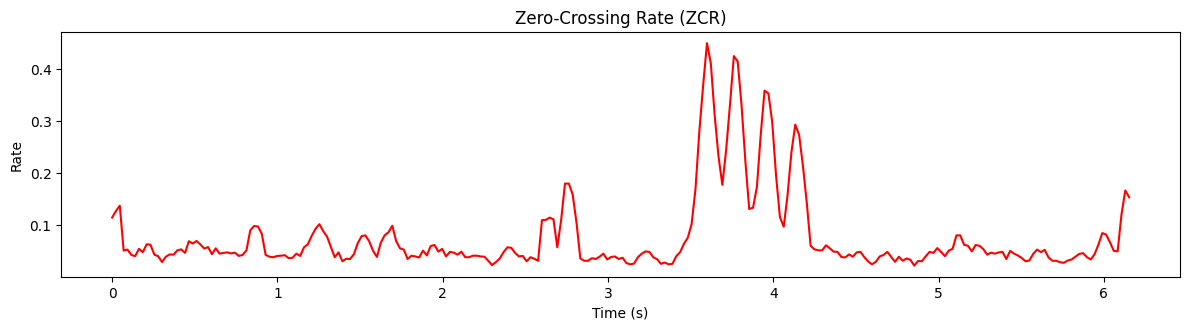

In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_path = "train_audio/comsan/XC113844.ogg"
y, sr = librosa.load(audio_path, sr=22050)

# Calculate Zero-Crossing Rate
zcr = librosa.feature.zero_crossing_rate(y)[0]

# Plotting waveform and ZCR
plt.figure(figsize=(12, 6))

# Plot ZCR
plt.subplot(2, 1, 2)
frames = range(len(zcr))
t = librosa.frames_to_time(frames, sr=sr)
plt.plot(t, zcr, color='r')
plt.title("Zero-Crossing Rate (ZCR)")
plt.xlabel("Time (s)")
plt.ylabel("Rate")

plt.tight_layout()
plt.show()


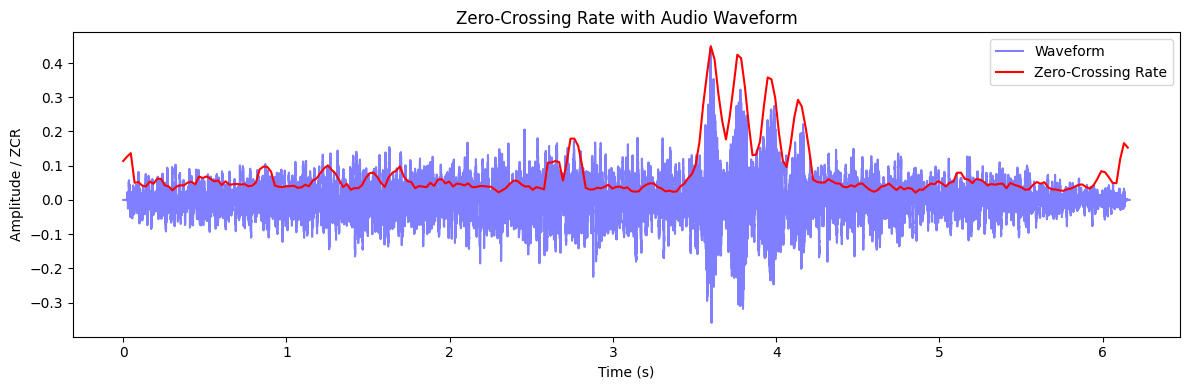

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_path = "train_audio/comsan/XC113844.ogg"
y, sr = librosa.load(audio_path, sr=22050)

# Calculate Zero-Crossing Rate
zcr = librosa.feature.zero_crossing_rate(y, frame_length=2048, hop_length=512)[0]

# Calculate the time variable for the ZCR plot
frames = range(len(zcr))
t_zcr = librosa.frames_to_time(frames, sr=sr, hop_length=512)

# Generate time for waveform plot
t_wave = np.linspace(0, len(y) / sr, num=len(y))

# Plot
plt.figure(figsize=(12, 4))
plt.plot(t_wave, y, color='blue', alpha=0.5, label='Waveform')                 # Plot waveform
plt.plot(t_zcr, zcr, color='red', linewidth=1.5, label='Zero-Crossing Rate')  # Overlay ZCR
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / ZCR')
plt.title('Zero-Crossing Rate with Audio Waveform')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


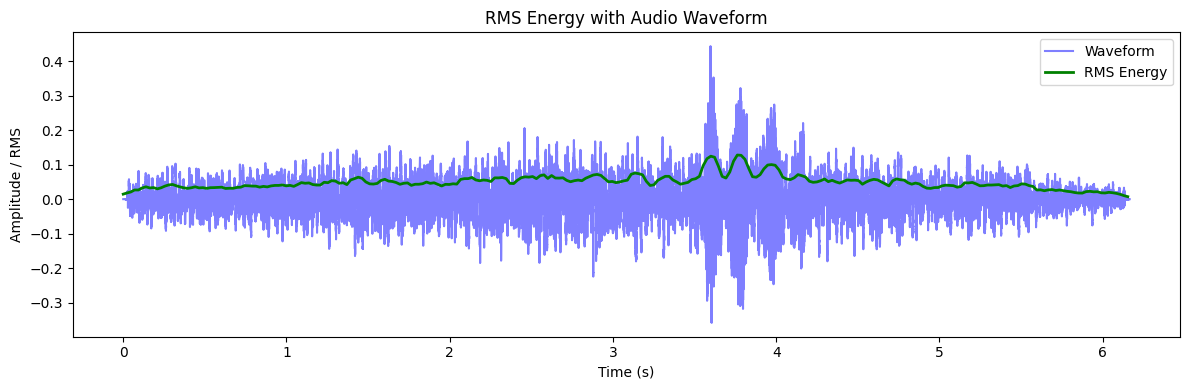

In [5]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_path = "train_audio/comsan/XC113844.ogg"
y, sr = librosa.load(audio_path, sr=22050)

# Compute RMS Energy
rms = librosa.feature.rms(y=y, frame_length=2048, hop_length=512)[0]

# Time variable for RMS
frames = range(len(rms))
t_rms = librosa.frames_to_time(frames, sr=sr, hop_length=512)

# Time variable for waveform
t_wave = np.linspace(0, len(y) / sr, num=len(y))

# Plot
plt.figure(figsize=(12, 4))
plt.plot(t_wave, y, color='blue', alpha=0.5, label='Waveform')          # Plot waveform
plt.plot(t_rms, rms, color='green', linewidth=2, label='RMS Energy')    # Overlay RMS
plt.xlabel('Time (s)')
plt.ylabel('Amplitude / RMS')
plt.title('RMS Energy with Audio Waveform')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


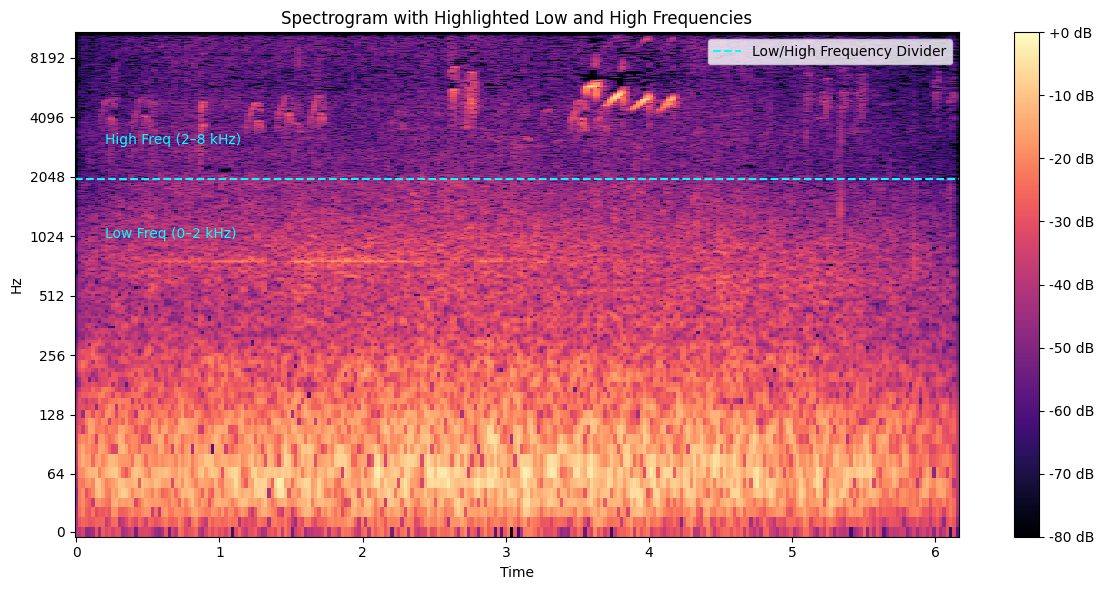

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio
audio_path = 'train_audio/comsan/XC113844.ogg'  # Replace with actual file path
y, sr = librosa.load(audio_path)

# Compute Short-Time Fourier Transform
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
frequencies = librosa.fft_frequencies(sr=sr)
times = librosa.frames_to_time(np.arange(S_db.shape[1]), sr=sr)

# Plot spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, x_axis='time', y_axis='log', sr=sr, cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram with Highlighted Low and High Frequencies')

# Highlight low-frequency band (0–2000 Hz)
plt.axhline(y=2000, color='cyan', linestyle='--', label='Low/High Frequency Divider')

# Optional: annotate the plot
plt.text(0.2, 1000, 'Low Freq (0–2 kHz)', color='cyan', fontsize=10)
plt.text(0.2, 3000, 'High Freq (2–8 kHz)', color='cyan', fontsize=10)

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
